In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.draw import circle

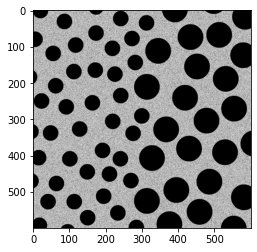

In [3]:
# Recebendo a imagem em escalas de cinza
imagem_original=cv2.imread("fig943.tif", 0)
plt.imshow(imagem_original, cmap="gray")

In [31]:
def erosao(imagem, filtro):
    """
    Função que realizará a técnica de morfologia matemática de Erosão em uma dada imagem
    com um respectivo filtro (kernel).
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem que sofrerá a modificação
    
    filtro: numpy.array
        Matrix responsável pela alteração na imagem
    
    Return
    -----------
    output_imagem: numpy.array
        Imagem após o processo de convolução com seu respectivo
        filtro
    
    """
    # Dimensões da imagem
    altura, largura=imagem.shape
    
    # Valor máximo da imagem (1, por se tratar de uma imagem binarizada)
    max_val=imagem.max()
    
    # Capturando a borda da imagem
    limite_borda=(filtro.shape[0]-1)//2
    
    # Soma de todos os elementos contidos no Filtro
    filtro_sum=np.sum(filtro)
    
    # Declarando a matriz que armanezará a imagem de saída
    output_imagem=np.zeros((altura, largura))  
    
    # Operação de erosão da imagem
    for x in range(limite_borda, altura-limite_borda):
        for y in range(limite_borda, largura-limite_borda):
            # Condição que verifica se o filtro está sobreposto à uma região da imagem
            if np.sum(imagem[x-limite_borda: x+limite_borda+1, y-limite_borda: y+limite_borda+1]*filtro)==filtro_sum:
                # Substituição dos valores pelo valor máximo
                output_imagem[x, y]=max_val
    
    # Redimencionamento da imagem de saída, para retirar as bordas mantidas após a dilatação
    output_imagem=output_imagem[limite_borda: altura-limite_borda, limite_borda: largura-limite_borda]


    return output_imagem

In [32]:
def dilatacao(imagem, filtro):
    """
    Função que realizará a técnica de morfologia matemática de dilatação em uma dada imagem
    com um respectivo filtro (kernel).
    
    Parâmetros
    -----------
    imagem: numpy.array 
        Imagem que sofrerá a modificação
    
    filtro: numpy.array
        Matrix responsável pela alteração na imagem
    
    Return
    -----------
    output_imagem: numpy.array
        Imagem após o processo de convolução com seu respectivo
        filtro
    
    """ 
    # Como estamos lindando com uma imagem binária, seus valores de max e min serão 1 e 0, respectivamente
    max_val=1
    min_val=0
    # Função para binarização da imagem
    _, imgagem_binaria = cv2.threshold(imagem, min_val, max_val, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
    
    # Dimensões da imagem
    altura, largura=imgagem_binaria.shape
    
    # Capturando a borda da imagem
    limite_borda=(filtro.shape[0]-1)//2
    
    # Declarando a matriz que armanezará a imagem de saída
    output_imagem=np.zeros((altura, largura))
    
    # Operação de dilatação da imagem
    for x in range(limite_borda, altura-limite_borda):
        for y in range(limite_borda, largura-limite_borda):
            # Condição que verifica se houve sobreposição na imagem 
            if np.sum(imgagem_binaria[x-limite_borda: x+limite_borda+1, y-limite_borda: y+limite_borda+1]*filtro) != min_val:
                # Substituição dos valores pelo valor máximo
                output_imagem[x, y]=max_val 
    
    # Redimencionamento da imagem de saída, para retirar as bordas mantidas após a dilatação
    output_imagem=output_imagem[limite_borda:altura-limite_borda, limite_borda:largura-limite_borda]

    return output_imagem

<ipython-input-8-5b3f09d046d8>:2: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  circular_filter[circle(30, 30, 30)]=1


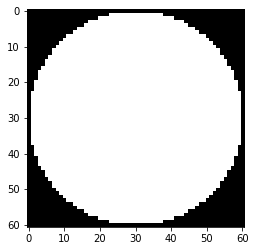

In [8]:
# Declarando o elemento estruturante que será utilizado como filtro nas funções de morfologia matemática
filtro_circular=np.zeros((61, 61))
# O método circle gera um elemento circular. Segundo González, o raio do círculo aconselhado seria de 30 pixels
filtro_circular[circle(30, 30, 30)]=1 

plt.imshow(filtro_circular, cmap="gray")

In [33]:
imagem_dilatada=dilatacao(imagem_original, filtro_circular)

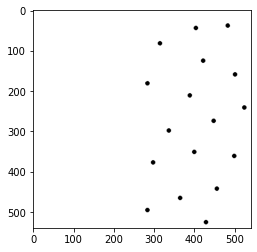

In [34]:
plt.imshow(imagem_dilatada, "gray")

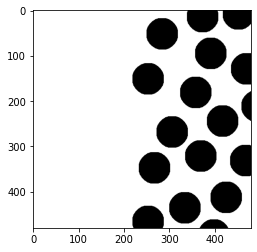

In [35]:
imagem_final=erosao(imagem_dilatada, filtro_circular)
plt.imshow(imagem_final, "gray")

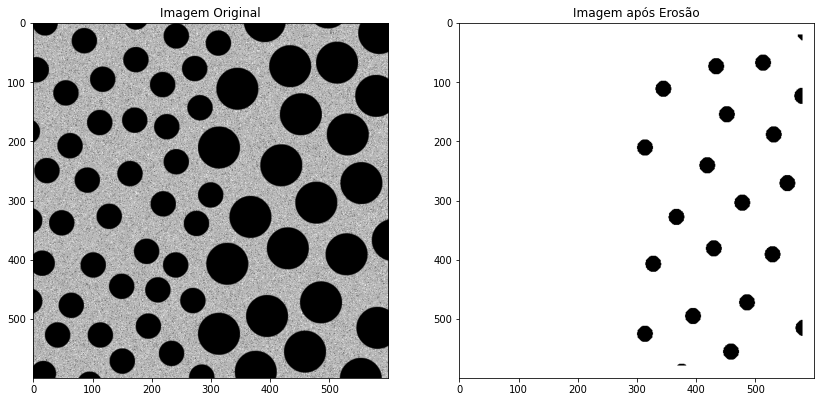

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,14))

ax[0].imshow(imagem_original, cmap="gray")
ax[1].imshow(imagem_erosao, cmap="gray")

titulos=["Imagem Original",
         "Imagem após Erosão"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc="center")

   Para a filtragem dos círculos médios da Figura 9.34, provinda do livro texto do Gonzáles, utilizou-se a técnica de Erosão, a qual desgasta os limites (bordas) do objeto em primeiro plano. Em relação ao filtro temos a mesma lógica da convolução, o qual percorre a imagem inteira e, assim, aplica as alterações com valores binários.  
   Como se trata de uma imagem que é possível fazer a alteração do seu fundo para branco, é recomendável resolver a questão com essa metodologia, entretanto ela apresenta uma limitação. Devido a utilização da técnica de Erosão, todos elementos da imagem tiveram seu formato modificado, assim os círculos maiores tiveram sua circunferência reduzida.

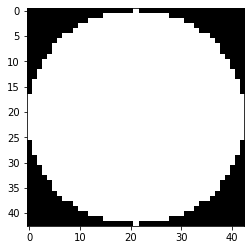

In [21]:
plt.imshow(filtro, cmap="gray")

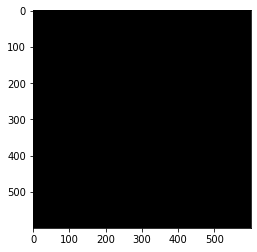

In [23]:
dilatadassa=cv2.dilate(imagem_dilatada, filtro)
plt.imshow(dilatadassa, cmap="gray")

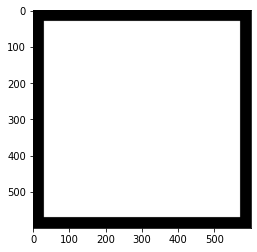

In [24]:
#_, mask=cv2.threshold(imagem_erosao, 220, 255, cv2.THRESH_BINARY)

# filtro_dilatacao=cv2.getStructuringElement(cv2.MORPH_DILATE,(5,5))

imagem_dilatada=dilatacao(imagem_dilatada, filtro)

plt.imshow(imagem_dilatada, cmap="gray")

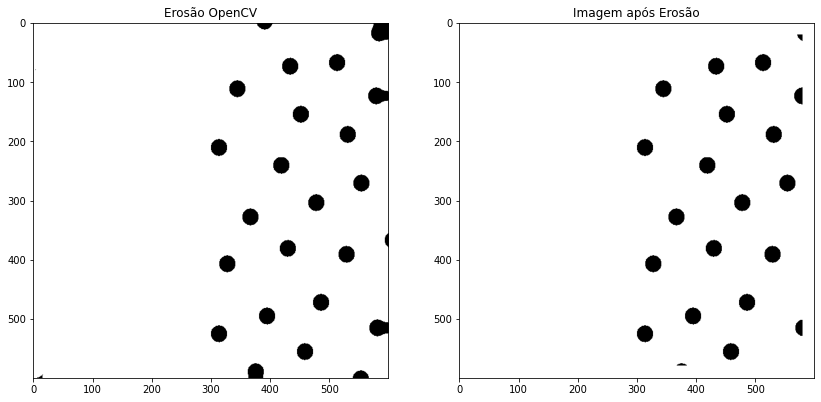

In [15]:
erosaum = 255 - cv2.erode(mask, filtro)
fig, ax = plt.subplots(1,2, figsize=(14,14))

ax[0].imshow(erosaum, cmap="gray")
ax[1].imshow(imagem_erosao, cmap="gray")

titulos=["Erosão OpenCV",
         "Imagem após Erosão"]

for obj, title in zip(ax.ravel(), titulos):
    obj.set_title(title, loc="center")